In [74]:
import pandas as pd
import numpy as np

import pandas as pd
import ast
from collections import Counter

# Assuming you have already loaded your DataFrame
df = pd.read_csv('eval_reranked_new.csv')  # Uncomment this line if you need to load the data
df.head()
df_analysis =df[['bibcode', 'list_of_branch', 'uat_keywords','retreived_branches_abstract','retreived_branches_concepts']]



In [75]:
df.head()

,bibcode,abstract,uat,uat_keywords,uat_lenght,type,output,list_of_branch,retreived_branches_abstract,retreived_branches_concepts,retreived_keywords_abstract
0,2024ApJ...961L..13K,Potential contribution from gamma-ray sources ...,"['567', '628']","['Galactic cosmic rays', 'Gamma-ray astronomy']",2,reranked,UAT Branches in order of relevance:\n1. Branc...,['High energy astrophysics>Particle astrophysi...,['High energy astrophysics>Transient sources>G...,['Cosmology>Astronomical radiation sources>Gam...,"{'concepts': [{'term': 'Gamma-ray Sources', 'e..."
1,2023ApJ...953....3H,We have measured line widths in active region ...,"['1989', '1485', '1988', '1992', '1995', '2038...","['Solar coronal heating', 'Solar coronal loops...",7,reranked,UAT Branches in order of relevance:\n1. Branc...,['Solar physics>Solar activity>Solar active re...,['Solar physics>Solar activity>Solar active re...,"['Solar physics>Helioseismology', 'Solar physi...","{'concepts': [{'term': 'Coronal Loops', 'expla..."
2,2024AJ....167..137O,We report here the performance and first resul...,"['1277', '1278', '164', '870', '739', '1145']","['Polarimeters', 'Polarimetry', 'Blazars', 'Je...",6,reranked,UAT Branches in order of relevance:\n1. Branc...,['Observational astronomy>Astronomical instrum...,['Observational astronomy>Astronomical instrum...,['Observational astronomy>Astronomical instrum...,"{'concepts': [{'term': 'Optical Polarimetry', ..."
3,2022AJ....163..144G,"New sets of young M dwarfs with complex, sharp...","['1761', '1213', '1681', '1290', '982', '1629'...","['Variable stars', 'Periodic variable stars', ...",9,reranked,UAT Branches in order of relevance:\n1. Branc...,['Stellar astronomy>Stellar types>Variable sta...,['Stellar astronomy>Stellar types>Variable sta...,['Stellar astronomy>Stellar types>Stellar spec...,"{'concepts': [{'term': 'M dwarfs', 'explanatio..."
4,2021ApJ...916....6G,We investigate the origin of self-absorption i...,"['834', '352', '371']","['Interstellar clouds', 'Dark interstellar clo...",3,reranked,UAT Branches in order of relevance:\n1. Branc...,['Galactic and extragalactic astronomy>Galaxy ...,['Galactic and extragalactic astronomy>Galaxy ...,['Stellar astronomy>Stellar types>Stellar spec...,{'concepts': [{'term': '[O I] 63 μm line emiss...


In [76]:
df_analysis['list_of_branch'] = df_analysis['list_of_branch'].apply(lambda x: ast.literal_eval(x))
df_analysis['uat_keywords'] = df_analysis['uat_keywords'].apply(lambda x: ast.literal_eval(x))
df_analysis['retreived_branches_concepts'] =  df_analysis['retreived_branches_concepts'].apply(lambda x: ast.literal_eval(x))
df_analysis['retreived_branches_abstract'] =  df_analysis['retreived_branches_abstract'].apply(lambda x: ast.literal_eval(x))


C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\1383364852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['list_of_branch'] = df_analysis['list_of_branch'].apply(lambda x: ast.literal_eval(x))
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\1383364852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['uat_keywords'] = df_analysis['uat_keywords'].apply(lambda x: ast.literal_eval(x))
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\1383364852.py:3

In [77]:
type(df_analysis['retreived_branches_abstract'][0])

list

In [78]:
def add_unique_words_column(df, input_column='list_of_branch', output_column='unique_words_in_branch'):
    def extract_unique_words(branch_list):
        return list(set([word for branch in branch_list for word in branch.split('>')]))
    
    df[output_column] = df[input_column].apply(extract_unique_words)
    return df

def add_last_words_column(df, input_column='list_of_branch', output_column='last_words_in_branch'):
    def extract_last_words(branch_list):
        return [branch.split('>')[-1].strip() for branch in branch_list]
    
    df[output_column] = df[input_column].apply(extract_last_words)
    return df

In [79]:
df_analysis = add_unique_words_column(df_analysis)
df_analysis = add_last_words_column(df_analysis)



C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\3324942791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output_column] = df[input_column].apply(extract_unique_words)
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\3324942791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[output_column] = df[input_column].apply(extract_last_words)


In [80]:
df_analysis

,bibcode,list_of_branch,uat_keywords,retreived_branches_abstract,retreived_branches_concepts,unique_words_in_branch,last_words_in_branch
0,2024ApJ...961L..13K,[High energy astrophysics>Particle astrophysic...,"[Galactic cosmic rays, Gamma-ray astronomy]",[High energy astrophysics>Transient sources>Ga...,[Cosmology>Astronomical radiation sources>Gamm...,"[Milky Way dynamics, Galactic and extragalacti...","[Gamma-ray sources, Milky Way Galaxy physics, ..."
1,2023ApJ...953....3H,[Solar physics>Solar activity>Solar active reg...,"[Solar coronal heating, Solar coronal loops, A...",[Solar physics>Solar activity>Solar active reg...,"[Solar physics>Helioseismology, Solar physics>...","[Solar magnetic flux emergence, Interdisciplin...","[Solar active region velocity fields, Solar ac..."
2,2024AJ....167..137O,[Observational astronomy>Astronomical instrume...,"[Polarimeters, Polarimetry, Blazars, Jets, Hig...",[Observational astronomy>Astronomical instrume...,[Observational astronomy>Astronomical instrume...,"[Stellar astronomy, Observational astronomy, C...","[Polarimeters, Polarimetry, Astronomical detec..."
3,2022AJ....163..144G,[Stellar astronomy>Stellar types>Variable star...,"[Variable stars, Periodic variable stars, T Ta...",[Stellar astronomy>Stellar types>Variable star...,[Stellar astronomy>Stellar types>Stellar spect...,"[Stellar astronomy, Observational astronomy, I...","[BY Draconis stars, M dwarf stars, Starspots, ..."
4,2021ApJ...916....6G,[Galactic and extragalactic astronomy>Galaxy p...,"[Interstellar clouds, Dark interstellar clouds...",[Galactic and extragalactic astronomy>Galaxy p...,[Stellar astronomy>Stellar types>Stellar spect...,"[Chemical abundances, Interstellar abundances,...","[Galactic abundances, Interstellar abundances,..."
...,...,...,...,...,...,...,...
91,2024RNAAS...8...86F,[Exoplanet astronomy>Exoplanet structure>Exopl...,"[Transits, Time series analysis, Ultraviolet s...",[Exoplanet astronomy>Exoplanet structure>Exopl...,[Observational astronomy>Astronomical methods>...,"[Stellar astronomy, Observational astronomy, I...","[Exoplanet atmospheric evolution, Exoplanet at..."
92,2022ApJS..263...22H,[Solar physics>Solar particle emission>Solar e...,"[Active sun, Solar energetic particles, Active...","[Solar physics>Solar abundances, Solar physics...",[Solar physics>Solar activity>Solar active reg...,"[Interdisciplinary astronomy, Observational as...","[Solar energetic particles, Solar abundances, ..."
93,2020ApJ...893....1B,[Galactic and extragalactic astronomy>Galaxy p...,"[Metallicity, Ultraviolet astronomy, Emission ...",[Galactic and extragalactic astronomy>Galaxy p...,[Interdisciplinary astronomy>Astrochemistry>Ch...,"[Interstellar abundances, Interdisciplinary as...","[Galaxy abundances, Galactic abundances, Galax..."
94,2019ApJ...882....2V,[High energy astrophysics>Black hole physics>B...,"[Accretion, Magnetohydrodynamics, Black hole p...",[High energy astrophysics>Black hole physics>B...,[High energy astrophysics>Black hole physics>B...,"[Interdisciplinary astronomy, Observational as...","[Black hole accretion disks, Magnetohydrodynam..."


In [81]:
def add_overlap_and_accuracy_columns(df, uat_keywords_col='uat_keywords', unique_words_col='unique_words_in_branch', last_words_col='last_words_in_branch'):
    def count_overlap(word_list, keywords):
        return len(set(word_list) & set(keywords))
    
    def calculate_accuracy(overlap, total_keywords):
        return overlap / total_keywords if total_keywords > 0 else 0
    
    def preprocess_keywords(keywords):
        return [keyword.strip().lower() for keyword in keywords]
    
    # Preprocess UAT keywords
    df[uat_keywords_col] = df[uat_keywords_col].apply(preprocess_keywords)
    
    # Calculate overlap and accuracy for branches (unique_words)
    df['overlap_branches'] = df.apply(
        lambda row: count_overlap(
            [word.lower() for word in row[unique_words_col]],
            row[uat_keywords_col]
        ),
        axis=1
    )
    df['accuracy_branches'] = df.apply(
        lambda row: calculate_accuracy(row['overlap_branches'], len(row[uat_keywords_col])),
        axis=1
    )
    
    # Calculate overlap and accuracy for concepts (last_words)
    df['overlap_concepts'] = df.apply(
        lambda row: count_overlap(
            [word.lower() for word in row[last_words_col]],
            row[uat_keywords_col]
        ),
        axis=1
    )
    df['accuracy_concepts'] = df.apply(
        lambda row: calculate_accuracy(row['overlap_concepts'], len(row[uat_keywords_col])),
        axis=1
    )
    
    return df
# Example usage:
df_analysis = add_overlap_and_accuracy_columns(df_analysis)

C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\2919278413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[uat_keywords_col] = df[uat_keywords_col].apply(preprocess_keywords)
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\2919278413.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overlap_branches'] = df.apply(
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_12608\2919278413.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [82]:
df_analysis.describe()

,overlap_branches,accuracy_branches,overlap_concepts,accuracy_concepts
count,96.000000,96.000000,96.000000,96.000000
mean,1.645833,0.411104,0.947917,0.225365
std,1.187471,0.295798,0.988031,0.236817
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.200000,0.000000,0.000000
50%,2.000000,0.396104,1.000000,0.200000
75%,2.000000,0.600000,2.000000,0.333333
max,4.000000,1.000000,4.000000,1.000000


In [96]:
(df_analysis[df_analysis['accuracy_branches'] > 0.5]).shape

(26, 12)

In [87]:
print("abstract")
print(df['abstract'][87])
print("user provided keywords")
print(df_analysis['uat_keywords'][87])
print('*****************************************************')
print("pipeline generated keywords")
print(df_analysis["last_words_in_branch"][87])
print('*****************************************************')
print("pipeline provided branches")
print(df_analysis['list_of_branch'][87])

abstract
We analyze variability in 15-season optical lightcurves from the doubly imaged lensed quasar SDSS J165043.44+425149.3 (SDSS1650), comprising five seasons of monitoring data from the Maidanak Observatory (277 nights in total, including the two seasons of data previously presented in Vuissoz et al.), five seasons of overlapping data from the Mercator telescope (269 nights), and 12 seasons of monitoring data from the US Naval Observatory, Flagstaff Station at lower cadence (80 nights). We update the 2007 time-delay measurement for SDSS1650 with these new data, finding a time delay of ${\rm{\Delta }}{t}_{\mathrm{AB}}=-{55.1}_{-3.7}^{+4.0}$ days, with image A leading image B. We analyze the microlensing variability in these lightcurves using a Bayesian Monte Carlo technique to yield measurements of the size of the accretion disk at λ <SUB>rest</SUB> = 2420 Å, finding a half-light radius of log(r <SUB>1/2</SUB>/cm) = ${16.19}_{-0.58}^{+0.38}$ assuming a 60° inclination angle. This r

In [60]:
prompt = f'''Qualitative Analysis and Simplified Scoring of Astronomy Abstract Based on UAT Concept Keywords
You are an expert in qualitative analysis, astronomical research, and the Unified Astronomy Thesaurus (UAT). Your task is to analyze the given astronomy-related abstract using both user-provided keywords and AI-generated keywords with their corresponding branches, all based on UAT concepts. Follow these steps to complete the analysis and provide a simplified score:

Review the astronomy abstract carefully.
Examine the user-provided UAT concept keywords:

Assess relevance to the abstract
Consider how UAT concepts relate to the astronomical themes discussed


Analyze the AI-generated UAT concept keywords and their branches:

Evaluate accuracy and relevance in the context of UAT and the abstract
Consider missing or irrelevant keywords/branches
Assess how well broader UAT concepts capture specific research details


Compare user-provided and AI-generated UAT concept keywords:

Consider similarities, differences, and overall representation of the research


Conduct a comprehensive analysis:

Consider main themes, representation by UAT concepts, and any overlooked aspects


Score the AI-generated UAT concept keywords and branches:

Consider factors such as:

Accuracy in representing the abstract using UAT concepts
Appropriate use of UAT hierarchy and relationships
Balance between broader concepts and specific research topics
Clarity of organization
Ability to capture the essence of the research




Provide the final score in the following format, without any additional explanation:
Score = X/10
Where X is your numerical assessment based on the above analysis, rounded to the nearest whole number.

Note: While you should conduct a thorough analysis to determine the score, you should not provide any written explanation or justification in your response. The output should consist solely of the score in the specified format.
Abstract:{df['abstract'][59]}
User provided keywords:{df_analysis['uat_keywords'][59]}
Pipeline generated keywords:{df_analysis["last_words_in_branch"][59]}
Pipeline provided branches:{df_analysis['list_of_branch'][59]}
'''

In [61]:
from vertexai_llm import get_response

prompt = f'''Qualitative Analysis and Simplified Scoring of Astronomy Abstract Based on UAT Concept Keywords
You are an expert in qualitative analysis, astronomical research, and the Unified Astronomy Thesaurus (UAT). Your task is to analyze the given astronomy-related abstract using both user-provided keywords and AI-generated keywords with their corresponding branches, all based on UAT concepts. Follow these steps to complete the analysis and provide a simplified score:

Review the astronomy abstract carefully.
Examine the user-provided UAT concept keywords:

Assess relevance to the abstract
Consider how UAT concepts relate to the astronomical themes discussed


Analyze the AI-generated UAT concept keywords and their branches:

Evaluate accuracy and relevance in the context of UAT and the abstract
Consider missing or irrelevant keywords/branches
Assess how well broader UAT concepts capture specific research details


Compare user-provided and AI-generated UAT concept keywords:

Consider similarities, differences, and overall representation of the research


Conduct a comprehensive analysis:

Consider main themes, representation by UAT concepts, and any overlooked aspects


Score the AI-generated UAT concept keywords and branches:

Consider factors such as:

Accuracy in representing the abstract using UAT concepts
Appropriate use of UAT hierarchy and relationships
Balance between broader concepts and specific research topics
Clarity of organization
Ability to capture the essence of the research




Provide the final score in the following format, without any additional explanation:
Score = X/10
Where X is your numerical assessment based on the above analysis, rounded to the nearest whole number.

Note: While you should conduct a thorough analysis to determine the score, you should not provide any written explanation or justification in your response. The output should consist solely of the score in the specified format.
Abstract:{df['abstract'][59]}
User provided keywords:{df_analysis['uat_keywords'][59]}
Pipeline generated keywords:{df_analysis["last_words_in_branch"][59]}
Pipeline provided branches:{df_analysis['list_of_branch'][59]}
'''

response = get_response(custom_prompt=prompt)

print(response)

Score = 7/10 



In [88]:
import re
from vertexai_llm import get_response
from tqdm import tqdm

def extract_score(response):
    match = re.search(r'Score = (\d+)/10', response)
    if match:
        return int(match.group(1))
    return None

def add_quality_scores(df, df_analysis):
    quality_scores = []

    for i in tqdm(range(len(df))):
        prompt = f'''Qualitative Analysis and Simplified Scoring of Astronomy Abstract Based on UAT Concept Keywords

You are an expert in qualitative analysis, astronomical research, and the Unified Astronomy Thesaurus (UAT). Your task is to analyze the given astronomy-related abstract using both user-provided keywords and AI-generated keywords with their corresponding branches, all based on UAT concepts. Follow these steps to complete the analysis and provide a simplified score:

Review the astronomy abstract carefully.
Examine the user-provided UAT concept keywords:
  Assess relevance to the abstract
  Consider how UAT concepts relate to the astronomical themes discussed
 
Analyze the AI-generated UAT concept keywords and their branches:
  Evaluate accuracy and relevance in the context of UAT and the abstract
  Consider missing or irrelevant keywords/branches
  Assess how well broader UAT concepts capture specific research details
 
Compare user-provided and AI-generated UAT concept keywords:
  Consider similarities, differences, and overall representation of the research
 
Conduct a comprehensive analysis:
  Consider main themes, representation by UAT concepts, and any overlooked aspects
 
Score the AI-generated UAT concept keywords and branches:
  Consider factors such as:
    Accuracy in representing the abstract using UAT concepts
    Appropriate use of UAT hierarchy and relationships
    Balance between broader concepts and specific research topics
    Clarity of organization
    Ability to capture the essence of the research
   
Provide the final score in the following format, without any additional explanation:
Score = X/10
Where X is your numerical assessment based on the above analysis, rounded to the nearest whole number.

Note: While you should conduct a thorough analysis to determine the score, you should not provide any written explanation or justification in your response. The output should consist solely of the score in the specified format.

Abstract: {df['abstract'][i]}
User provided keywords: {df_analysis['uat_keywords'][i]}
Pipeline generated keywords: {df_analysis["last_words_in_branch"][i]}
Pipeline provided branches: {df_analysis['list_of_branch'][i]}
'''

        response = get_response(custom_prompt=prompt)
        score = extract_score(response)
        quality_scores.append(score)

    df_analysis['quality_score'] = quality_scores
    return df_analysis

# Use the function
df_analysis = add_quality_scores(df, df_analysis)

  0%|          | 0/96 [00:00<?, ?it/s]

100%|██████████| 96/96 [01:12<00:00,  1.33it/s]


In [97]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bibcode                      96 non-null     object 
 1   list_of_branch               96 non-null     object 
 2   uat_keywords                 96 non-null     object 
 3   retreived_branches_abstract  96 non-null     object 
 4   retreived_branches_concepts  96 non-null     object 
 5   unique_words_in_branch       96 non-null     object 
 6   last_words_in_branch         96 non-null     object 
 7   overlap_branches             96 non-null     int64  
 8   accuracy_branches            96 non-null     float64
 9   overlap_concepts             96 non-null     int64  
 10  accuracy_concepts            96 non-null     float64
 11  quality_score                96 non-null     int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 9.1+ KB


<Axes: >

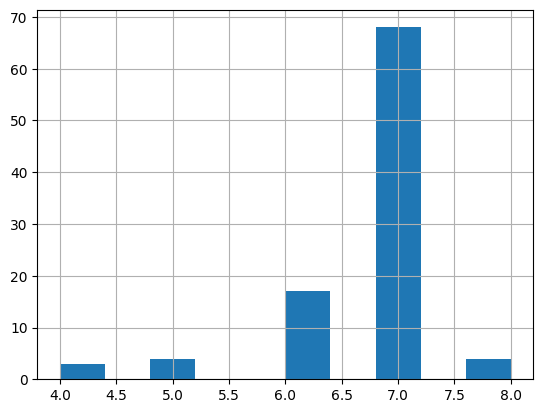

In [98]:
df_analysis.quality_score.hist()

In [99]:
df_analysis.to_csv('df_analysis_test_1.csv', index=False)